<a href="https://colab.research.google.com/github/Ajb2307/DSPS_ABaldelli/blob/main/HW10/CNN_sequential.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
import numpy as np
import pylab as plt

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
# putting values between (0, 1)
x_train = x_train.astype("float32") / 255. # . used so that it is floating point
x_test = x_test.astype("float32") / 255.

In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
# need to make these images
x_train = x_train.reshape(-1, 28,28,1)
x_test = x_test.reshape(-1, 28,28,1)

x_train.shape

(60000, 28, 28, 1)

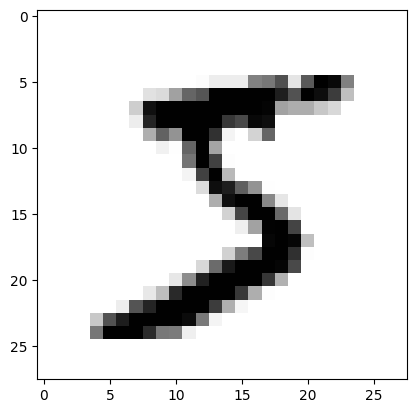

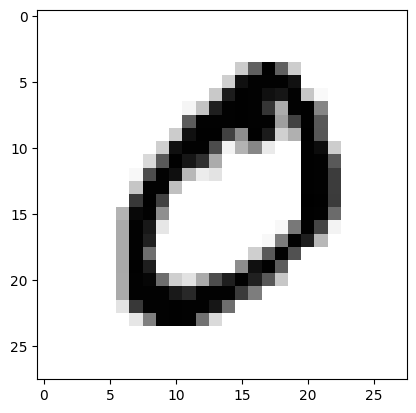

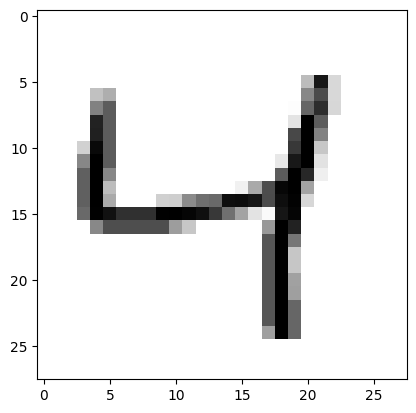

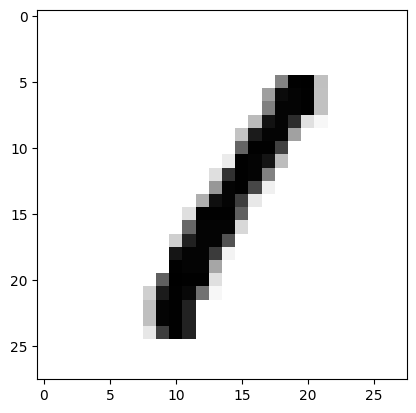

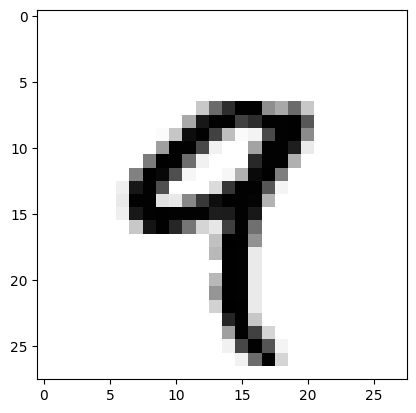

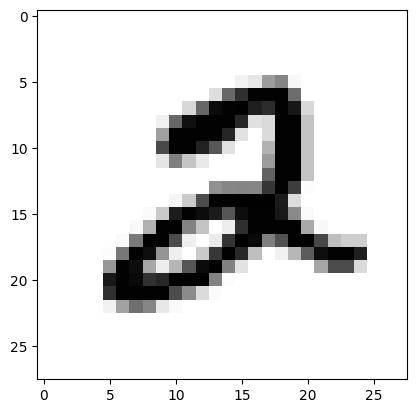

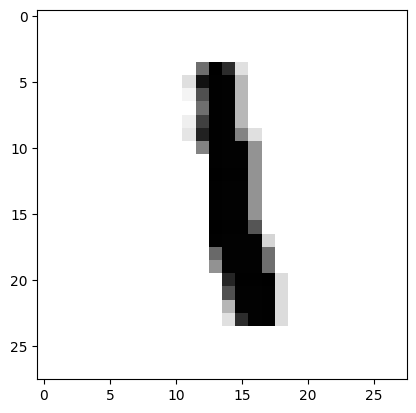

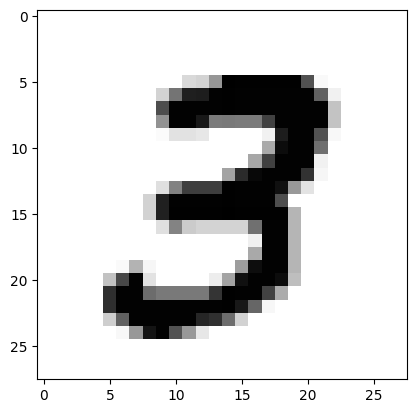

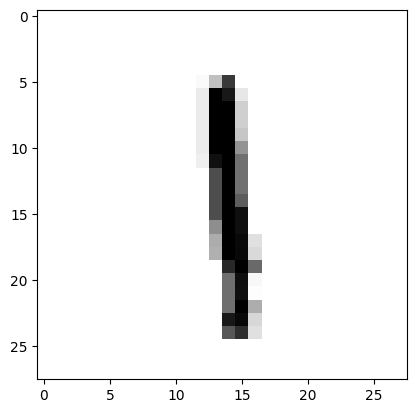

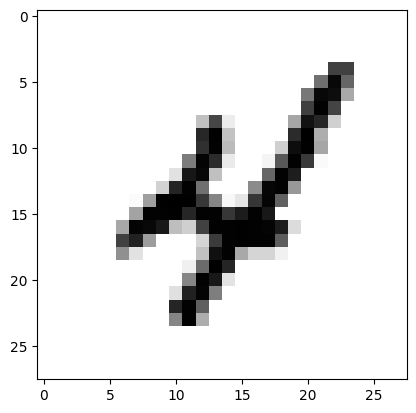

In [6]:
for i in range(10):
  plt.imshow(x_train[i], cmap = 'grey_r')
  plt.show()

First we have examples of handwritten numbers in Mnist dataset.

In [7]:
# change to be categorical values for numbers 0-9
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [8]:
x_trainraveled = x_train.reshape(x_train.shape[0], x_train.shape[1]*x_train.shape[2]*x_train.shape[3])
x_testraveled = x_test.reshape(x_test.shape[0], x_test.shape[1]*x_test.shape[2]*x_test.shape[3])
x_trainraveled[0].shape

(784,)

## NN done in class

In [9]:
mlp = keras.Sequential([                     # four layers of perceptrons
  layers.Dense(320, activation="sigmoid"),   # should be close to same as above size
  layers.Dense(32, activation="sigmoid"),
  layers.Dense(32, activation="sigmoid"),
  layers.Dense(10, activation="softmax")     # need 10 since with was 10 possible outputs
  ])


In [10]:
mlp.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [11]:

history1 = mlp.fit(x_trainraveled, y_train,
                  batch_size=120,
                  epochs=10, # small for this because simple problem
                  validation_split=0.25, # internal train and test sets within
                  verbose = 1 )


Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.5325 - loss: 1.7827 - val_accuracy: 0.8952 - val_loss: 0.6121
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9024 - loss: 0.5106 - val_accuracy: 0.9274 - val_loss: 0.3100
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9337 - loss: 0.2784 - val_accuracy: 0.9437 - val_loss: 0.2230
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9525 - loss: 0.1924 - val_accuracy: 0.9535 - val_loss: 0.1755
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9633 - loss: 0.1461 - val_accuracy: 0.9578 - val_loss: 0.1545
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9711 - loss: 0.1141 - val_accuracy: 0.9645 - val_loss: 0.1324
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9769 - loss: 0.0935 - val_accuracy: 0.9660 - val_loss: 0.1232
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9821 - loss: 0.0739 - val_accuracy: 0.

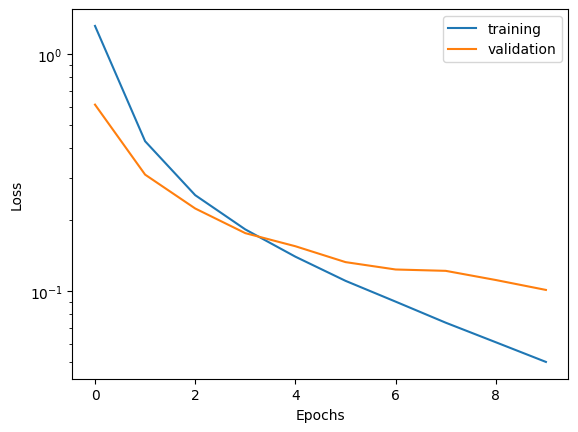

In [12]:
plt.plot(history1.history["loss"], label = "training")
plt.plot(history1.history["val_loss"], label = "validation")
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.yscale("log")
plt.show()

**Figure 1:** This plot shows the loss function of training and testing data using the NN. The data being used is MNIST, which is a dataset 60,000 of handwritten digits. The loss function is the categorical cross entropy function. As this problem is a standard easy Machine Learning problem, the NN is able to learn the numbers in $< 4$ epochs. After around four epochs we seen the loss function stop improving in the validation dataset as significantly. This signals that this is the best this model can do before overfitting to the training set. The final accuracy achieved is 97.2%. This is very good especially when you consider than the images must be inputted as a 1D array.

In [23]:
mlp.evaluate(x_testraveled, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9672 - loss: 0.1098


[0.0989355817437172, 0.972000002861023]

## CNN done for HW 10

In [18]:
input_shape = x_train[0].shape

model = keras.Sequential()
model.add(Conv2D(32, kernel_size=(10, 10),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax')) # need 10 since with was 10 possible outputs

In [19]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [20]:
history = model.fit(x_train, y_train,
                  batch_size=120,
                  epochs=10, # small for this because simple problem
                  validation_split=0.25, # internal train and test sets within
                  verbose = 1 )

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.8058 - loss: 0.6271 - val_accuracy: 0.9649 - val_loss: 0.1143
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9728 - loss: 0.0895 - val_accuracy: 0.9799 - val_loss: 0.0670
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9827 - loss: 0.0560 - val_accuracy: 0.9822 - val_loss: 0.0561
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9865 - loss: 0.0425 - val_accuracy: 0.9815 - val_loss: 0.0599
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9876 - loss: 0.0398 - val_accuracy: 0.9838 - val_loss: 0.0558
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9906 - loss: 0.0313 - val_accuracy: 0.9841 - val_loss: 0.0523
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9927 - loss: 0.0234 - val_accuracy: 0.9879 - val_loss: 0.0427
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9924 - loss: 0.0228 - val_accuracy: 0.

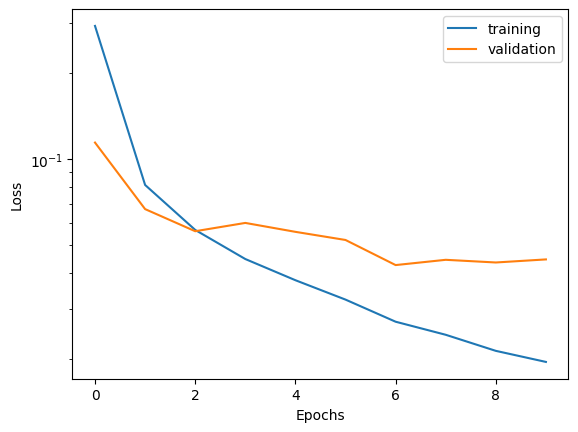

In [21]:
plt.plot(history.history["loss"], label = "training")
plt.plot(history.history["val_loss"], label = "validation")
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.yscale("log")
plt.show()

**Figure 2:** This plot shows the loss function of training and testing data using the CNN. The data being used is MNIST, which is a dataset 60,000 of handwritten digits. The loss function is the categorical cross entropy function. As this problem is a standard easy Machine Learning problem, our CNN is able to quickly  learn the numbers. After around two epochs we seen the loss function stop inproving in the validation dataset. This signals that this is the best this model can do before overfitting to the training set. When comparing this to the NN done in class we can see that this model learned sligtly faster and achieved a higher accuracy rate, 98.7% compared to the previous 97.2%. This makes sense becuase this is a more complex model and it is able to take in the data a 2D matrix, the actual form of the data, rather than needing preprocessing to take the dat in as a 1D array.

In [17]:
model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9854 - loss: 0.0460


[0.03769915923476219, 0.9876999855041504]